In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
# X = pd.DataFrame(X)
dforig = pd.read_csv('Electricitynew.csv')
        


In [9]:
df=dforig.drop(['Year', 'Country'], axis=1)

In [24]:
X = df.drop('CO2_Emissions', axis=1)
y = df['CO2_Emissions'] 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
#had , random_state=1  don't know if I want to keep that
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
clf = RandomForestClassifier(n_estimators=10).fit(X_train_scaled, y_train)
#random_state=1
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9411764705882353


In [31]:
feature_importances = clf.feature_importances_

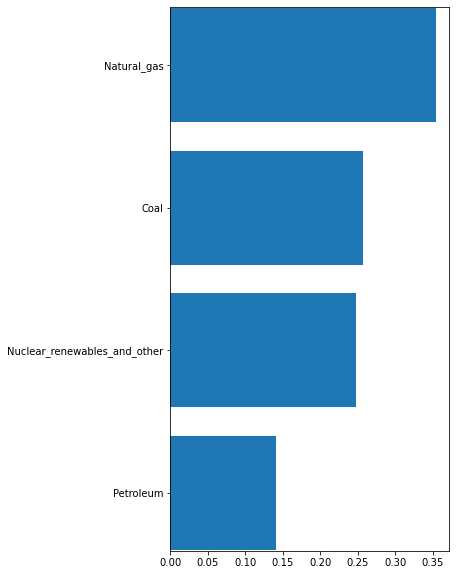

In [32]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()